In [1]:
import re
import html
import pandas as pd
import spacy
from string import punctuation
from math import sqrt, ceil
# gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
# plotting
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
# progress bars
from tqdm import tqdm
tqdm.pandas()

#### Import custom text preprocessing class for this exercise
For this dataset, the class `Textpreprocessor` is defined in the file `custom_preprocessing.py`.

In [2]:
from custom_preprocessing import TextPreprocessor

### Read in New York Times Dataset
A pre-processed version of the NYT news dataset is read in as a DataFrame.

In [3]:
data_path = "../data/nytimes.tsv"

df = pd.read_csv(data_path, sep='\t', header=None,
                 names=['date', 'headline', 'content'])
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df.head()

date                                           headline  \
0 2016-06-30  washington nationals max scherzer baffles mets...   
1 2016-06-30  mayor de blasios counsel to leave next month t...   
2 2016-06-30  three men charged in killing of cuomo administ...   
3 2016-06-30  tekserve precursor to the apple store to close...   
4 2016-06-30  once at michael phelpss feet and still chasing...   

                                             content  
0  Stellar pitching kept the Mets afloat in the f...  
1  Mayor Bill de Blasio’s counsel and chief legal...  
2  In the early morning hours of Labor Day last y...  
3  It was the Apple Store in New York City before...  
4  The United States Olympic swimming trials are ...

#### (Optional) Subset the dataframe for testing
Test on a subset of the full data for quicker results.

In [4]:
df1 = df.iloc[:1000, :].copy()
# df1 = df.copy()

#### Include some extra words to remove from article text
Some unnecessary worsd show up in the article text that also need to be added to the default stopword list.

In [5]:
extra_words = ['-pron-', 'mr', 'mrs', 'ms', 'dr', 'million']
removed_words = set(punctuation).union(set(extra_words))

#### Call TextProcessor class
Clean up the text content for the topic model. Stopword removal and lemmatization are done as well. 

In [6]:
preproc = TextPreprocessor()
df1['lemmas'] = df1['content'].progress_apply(
                lambda text: preproc.lemmatize(text, removed_words)
                )
df1.head()

  1%|          | 10/1000 [00:00<00:10, 95.09it/s]

Stellar pitching kept the Mets afloat in the first half of last season despite their offensive But they cannot produce an encore of their pennant winning season if their lineup keeps floundering while their pitching is nicked  bruised and stretched We were going to ride our pitching  Manager Terry Collins said before Wednesdays But were not riding it right Weve got as many problems with our pitching as we do Wednesdays 4 2 loss to the Washington Nationals was cruel for the already limping Pitching in Steven Matzs place  the spot starter Logan Verrett allowed two runs over five But even that was too large a deficit for the Mets lineup to overcome against Max Scherzer  the Nationals Were not even giving ourselves chances  Collins said  adding later  We just cant give our pitchers any room to The Mets did not score until the ninth inning  when a last gasp two run homer by James Loney off Nationals reliever Shawn Kelley snapped a streak of 23 scoreless innings for the The Mets were swept i

  4%|▍         | 45/1000 [00:00<00:09, 101.72it/s]

When the New York City Education Department put a new Success Academy charter school in a building housing a troubled Brooklyn middle school in 2012  many believed the middle school was on its way to The school  Junior High School 50  known as John Wells  had struggled for In 2014  Mayor Bill de Blasio  a Democrat  included it on a list of 94 chronically low performing schools that the city was infusing with money and social Only 49 students were admitted last But instead of dying  50  in the Williamsburg neighborhood  is showing signs of A new principal has added programs and The school is hopeful about its performance on this years standardized And for the first time in many years  enrollment is expected to increase 112 sixth graders are registered for September a sign that parents like what they see happening Now  in a twist  even as it grows  50 will have to give up five classrooms next year  because the Success Academy school is expanding to fifth Supporters of 50 are accusing the

  9%|▉         | 92/1000 [00:00<00:06, 131.45it/s]

a light and a battery scientists have been decoding their love notes for But recently I learned that you dont have to be an entomologist to try to talk to About 2 000 known species of fireflies inhabit temperate and tropical forests around the All of them  as larvae  produce bioluminescent light through a chemical reaction inside their But only some continue to flash as grown up beetles that we know as Most species developed their own flash pattern  or language  that they use to attract potential mates  warn predators about their toxicity  advertise a nutritious dowry  or  for some cannibalistic fireflies called femme fatales  mimic other firefly species and lure them in for A couple of species even flash in Two weeks ago  I took a new gadget with me to North Carolina and attempted a heart to heart with a I wanted to test out the Firefly Communicator  which was developed by Joey Stein  a nature enthusiast and The device is a hand held  battery operated  plastic thing a ma jig with two 

 14%|█▍        | 141/1000 [00:01<00:06, 139.62it/s]

couture being  perhaps  the original customization art in fashion  the one in which a customer goes to the atelier  chooses her dress and then  because it is being made for her only  has it altered as she so desires Jimmy Choo is planning to unveil its latest innovation  not a new heel height or shape  but a collection of crystal clip ons  buttons and bracelets that can decorate pumps and clutches and peep toe ankle laced stilettos  even slip on skater shoes   the better to luxe up an otherwise simple pair of shoes according to individual People really want to show their personality  and have something a little different  said Sandra Choi  Jimmy Choos creative This follows the introduction of Gucci DIY stage 2  a service in the brands flagship store in Milan that allows customization of jackets  tuxedos  coats and Then theres Opening Ceremonys new embroidery station  a sewing machine tucked away in the SoHo store where customers can personalize shirts and jackets with patches and The s

 18%|█▊        | 178/1000 [00:01<00:05, 137.75it/s]

The Supreme Court on Tuesday let stand appeals court decisions that had blocked abortion restrictions in Mississippi and The orders  part of a final set from the court before the justices left for their summer break  underscored the sweeping nature of Mondays abortion rights decision striking down similar restrictions in In the Mississippi case  Currier Jackson Womens Health Organization  14 997  a divided panel of the United States Court of Appeals for the Fifth Circuit  in New Orleans  had said the challenged law would have shut down the states only abortion Officials in Mississippi said women could obtain abortions in neighboring But Judge Grady Jolly  writing for the majority  said  Mississippi may not shift its obligation to respect the established constitutional rights of its citizens to another In the Wisconsin case  Schimel Planned Parenthood of Wisconsin  15 1200  Judge Richard Posner of the Seventh Circuit  in Chicago  had written an opinion that anticipated the majoritys app

 21%|██        | 209/1000 [00:01<00:05, 138.21it/s]

Young women who have sex before marriage are A girl who gives her body for love will make the boy who conquers her love her Premarital sex has a tremendous negative psychological and physical impact on These are some of the assertions in a sex education textbook approved by a provincial education department in China that has led to an outcry on social Outraged by the text  Senior Middle School Student Scientific Sex Education  a teacher posted photos from the book on Weibo  Chinas equivalent of Twitter  on Friday  unleashing a firestorm of I was so angry when I read the textbook  Zhong Guangquan  the teacher from Guangdong Province in southern China whose post started the online debate  told a Chinese website  Sixth The concepts are backward and all the negative comments are directed toward This makes me sick as a man I cant stand this  one Weibo user Since you want women not to have premarital sex  then please tell all boys to do the The publisher should name itself the 18th Century P

 24%|██▍       | 240/1000 [00:01<00:05, 130.94it/s]

Airbnb has charmed and strong armed lawmakers around the world to allow it to operate in their But two cities  Airbnbs hometown  San Francisco  and New York  the services largest United States market  have not been so On Monday  Airbnb sued San Francisco over a unanimous decision on June 7 by the citys Board of Supervisors to fine the company  1 000 a day for every unregistered host on its If Airbnb does not comply  it could face misdemeanor The suit follows a bipartisan move by New York lawmakers who voted this month to heavily fine anyone who uses Airbnb to rent a whole apartment for fewer than 30 days  a practice that has been illegal in the state since The actions show how Airbnb  despite aggressive lobbying efforts  has not been able to persuade some local legislators to play And in the case of New York  the company has demonstrated a surprisingly tin ear for local Were not afraid of money in New York  said Micah Lasher  a state Senate candidate and Airbnb critic  who worked for E

 27%|██▋       | 274/1000 [00:01<00:05, 145.16it/s]

The United Nations said Monday that its global development goals for 2030 were at risk of failure  estimating that if current trends continue  nearly 70 million children will die from mostly preventable causes and that 750 million girls will be married while still The organization also projected that more than 60 million primary school aged children will be out of school  more than half in sub Saharan The annual United Nations Childrens Fund report  The State of the Worlds Children 2016  reflected what Unicef officials said were widening disparities between rich and poor areas  with some of the poorest increasingly at The officials said the 172 page report was an emphatic warning that the so called Sustainable Development Goals created by the United Nations in 2015 might not be achieved by the 2030 target The goals are a set of 17 objectives for the eradication of poverty  hunger  illiteracy  gender discrimination and other The case thats being made is that we wont hit the goals that w

 30%|███       | 303/1000 [00:02<00:05, 126.22it/s]

As Israeli and Turkish leaders announced the formal resumption of full diplomatic relations after a six year fissure  the front page of the popular Hebrew newspaper Yediot Aharonot summed up the predicament for many Israelis  Reconciliation or Critics of the deal asked why Israel agreed to pay about  20 million in compensation to the families of 10 pro Palestinian activists who were killed during a 2010 raid by Israeli naval commandos after they met violent resistance aboard a Turkish passenger vessel as it tried to breach Israels blockade of the Gaza That episode set off the diplomatic crisis between the once close regional allies  and paying compensation was a capitulation  the critics Many Israelis also questioned what they called the gifts to Hamas  the Islamic militant group that controls They were referring to the humanitarian aid that Turkey plans to deliver to the Palestinian coastal enclave under the deal  and the promise of new residential buildings  a 200 bed hospital and in

 33%|███▎      | 334/1000 [00:02<00:05, 125.55it/s]

Investors are betting that a start up aiming to become the online equivalent of Costco for healthy foods can grow and The company  Thrive Market  said on Monday that it had raised  111 million in a new round of financing  led by the investment firm Other existing investors  including Greycroft Partners  E Ventures and Cross Culture Ventures  also took Thrive  founded three years ago by a group of entrepreneurs  is one of several start ups built around a membership But customers pay  60 a year to be able to buy organic food at what the company says are lower prices than what traditional grocers like Whole Foods The aim is to give more customers access to what the founders say is better Were looking to make healthy living affordable and accessible to any American family  Nick Green  a Thrive Market co founder  said in an It was an idea that initially drew little enthusiasm  according to Green  with dozens of venture capital firms rejecting him and his co founder Gunnar Lovelace for their

 36%|███▋      | 363/1000 [00:02<00:05, 112.93it/s]

British cultural organizations and prominent figures in theater  dance and film reacted with dismay after Britain voted to leave the European But as with many British industries and institutions  uncertainty prevails over what withdrawal will People who make their living in the arts had been strong supporters of the Remain campaign  with a survey of members of the Creative Industries Federation showing that 96 percent backed Britains membership in the European First time Ive ever felt ashamed and embarrassed to be British   And soon we may have no UK either  the choreographer Matthew Bourne posted on Twitter on Friday  referring to the possibility of another referendum on independence for Scotland  which voted overwhelmingly to stay within the European Canada  tweeted Josie Rourke  the artistic director of the Donmar Warehouse  a London Michael Ryan  the chairman of the Independent Film and Television Alliance  said in a statement on Friday that the decision was a major blow to the fil

 39%|███▉      | 388/1000 [00:03<00:05, 108.37it/s]

In an annual ritual  hundreds of thousands of students took the SAT this spring as they made their first steps toward applying to But they were not the only ones being Sprinkled among them in May  when the SAT was given for the second time since a much ballyhooed revamping  were a number of people long past college members of the test prep industry who took the exam to see how those changes played out in practice so that they could improve their tutoring Armed with perhaps sharper pencils and a more jaundiced eye than the typical 17 year old  they noticed two questions that some thought could throw off the performance of Their concerns are fueling a debate in the industry on Facebook and in private emails over whether the test items were sufficiently vetted for gender bias  and whether the exam was unfair to female The two items  one in the verbal portion and one in the math section  posed what some test prep experts considered a textbook example of stereotype When people are reminded 

 42%|████▏     | 415/1000 [00:03<00:04, 117.61it/s]

To those who have watched her swim circles around the competition  Katie Ledecky appears to have no peers in the Ledecky  however  knows At a meet outside Phoenix in April  she spotted Debbie Meyer  the woman she will probably be chasing at the Summer Olympics in Rio de Janeiro in August  and trundled over to say Meyer greeted her with a hug and exclaimed  Youre great  Two  four  Do it this summer  At the 1968 trials ahead of the Olympics in Mexico City  Meyer set world records in the 200  400 and 800 Two months after turning 16  she swept her events at the Summer Games to become the first swimmer to win three individual Olympic gold No Olympian since has matched Meyers 200 400 800 string of gold  the men contest the 1 500 meters instead of the Ledecky  19  may be the one to finally match the She owns the fastest times in the world this year in the 200   400  and 800 meter Aside from Michael Phelps  she was the only American swimmer who was 1 in the world in individual events in the 20

 47%|████▋     | 468/1000 [00:03<00:03, 159.43it/s]

Kelly Marie Jensen and Michael Christos Sembos were married June 25 by Andrew Keeler  a Universal Life minister  at Roger Wiliams Park Botanical Center in Providence  The bride  34  is the corporate photographer at Yale New Haven Health She graduated from the University of Virginia and is the daughter of Kathleen Jensen and William Jensen of Vernon  The groom  37  is a program coordinator for the Yale University Office of Development in New He is also a New Haven based musician who sings and plays guitar with a rock band called the Backyard He received two bachelors degrees  in math and in astronomy  from Western Connecticut State He is the son of Karen Sembos and Evangelos Sembos of Bridgeport  Jensen and Sembos met at a music festival in Durham  in May They were living in New Haven and had been invited by mutual friends  whereupon they decided to ride a Ferris wheel I felt this immediate physical attraction for him  she I just sat down next to him and started nervously Though Sembos 

 50%|█████     | 504/1000 [00:03<00:03, 134.74it/s]

Members of the news media got a sneak peek at the so called soul of the Rio de Janeiro Olympics with a visit Thursday to the athletes village  the brand new complex of residential towers where nearly 11 000 athletes and 6 000 coaches and handlers will sleep  eat and Local organizers said the complex  which they described as a city within the city  was the largest in Olympic In addition to the 31 17 story towers  the complex includes a huge cafeteria and gym  a post office  a first aid center and a This is where the soul of the Games will develop  said Mario Andrada  spokesman of the local organizing While athletes are not required to stay in the village many of the most popular stars may end up staying in alternative housing outside the complex organizers said it would be the most secure facility at an Olympics  patrolled by 85 000 police officers and That is twice the number of security personnel at the 2012 Games in Two fences will ring the complex  and everyone traveling in and out 

 52%|█████▏    | 519/1000 [00:03<00:04, 113.66it/s]

My partner and I rent a market rate apartment with a built in heating and air conditioning unit  but the air conditioning component does not An air conditioner repairman told us that the unit is 20 years old  rusted  and will likely start leaking into our apartment and the one below us if it is not He said replacing it would cost The landlord refuses to replace the unit  saying he is not responsible for air conditioning  only Our apartment will be unbearable this summer without Who is responsible  Battery Park City  Manhattan With July  and all the sweltering heat it brings  less than a week away  I can understand why you would want a functioning To figure out if your landlord has to fix or replace your broken one  read your lease See if it says anything about who is responsible for air conditioning  said David Frazer  a lawyer who represents The lease could put the burden on your landlord  but it could also put it on you  the It might also say nothing about air conditioners at If that

 55%|█████▍    | 545/1000 [00:04<00:03, 115.23it/s]

If were going to get out there and travel no matter what  as our earlier look at gay travel post Orlando suggested  where should we go  Matthieu Jost  the chief executive and a founder of misterb b  a website that helps travelers find gay friendly bed and breakfasts around the world  said Santiago  Chile  and Kuala Lumpur  Malaysia  have been popular searches on his site And those who responded to our callout on the Scruff app  when we also asked them for lesser known destinations that they have found to be lesbian  gay  bisexual and transgender friendly  suggested many  including Ogunquit  Maine  the Scottish Highlands  the Smoky Mountains and Here are some other places Nomadic Boys  Stefan Arestis and Sebastien Chaneac   globe trotting bloggers To some  the Philippines will present a conundrum  Its a religious place with a strong Roman Catholic presence  and there have been some high profile stories of violence there  including the 2015 murder of a transgender woman by a United State

 58%|█████▊    | 585/1000 [00:04<00:03, 105.73it/s]

This interview with Lisa Gersh  chief executive of Goop  a wellness company  was conducted and condensed by Adam Tell me about your early I grew up in the Bronx  and my parents both My mom had the greatest impact on me  in terms of always telling me that I could do whatever I wanted to You need your parents to tell you that because sometimes when youre just hanging around in seventh grade  it doesnt quite feel that We grew up pretty My parents both lost their jobs when I was 11  and I understood at a very early age that I was going to have to make things happen for I realized that babysitting for a dollar an hour was never going to get me anywhere  so I read an ad in the newspaper for umpires for girls They didnt have an age So I went to five classes  and I got my degree in umpiring girls These girls were older than I was  and I made  5 a I was a pretty entrepreneurial I always had a job in high I got a job at the Foodtown grocery store  and because it was unionized  I got time and a h

 60%|█████▉    | 597/1000 [00:04<00:05, 79.89it/s] 

This is the first in a series of articles dedicated to summer vacations that changed writers understanding of travel  or of A few years ago  I decided that the best time to go to Europe was It was mostly because everywhere we might visit  the local population was still at work  at school  at home  and it would be easier to sneak around  pretending not to be a When we decided to go to Bergamo  we intended to stay for a day or two  part of a mini tour of northern Italy  before visiting friends in Lake Como  but once we got there  we couldnt It was a lesson in being unprepared  in having bought the guidebook  but not having read it  in discovering for yourself what you soon realize millions of lucky travelers have discovered before Bergamo is exactly where the lush  well watered plains of northern Italy meet the The hotel we had found online was above the Città Alta  the original walled city  overlooking a deep valley full of fruit trees  grass and flower beds that benefit from 45 inches 

 62%|██████▏   | 624/1000 [00:04<00:03, 98.64it/s]

The International Cricket Councils meetings normally take place in But this years annual conference will start Monday in Edinburgh  a move that could be symbolic of the huge changes that may soon engulf Two years ago  the council restructured  concentrating power and money in the hands of three of the biggest cricket playing nations  Australia  England and The changes  which gave the three nations permanent positions on the main decision making committees and gave them more revenue than the other 102 members combined  attracted plenty of criticism  some of it from Transparency In the past year  the council has begun to take a different Last fall  Shashank Manohar replaced Narayanaswami Srinivasan as president of the Board of Control for Cricket in India and chairman of the and he immediately criticized the 2014 In November  Manohar said  I dont agree with the three major countries bullying the declaring  you cannot make the poor poorer and the rich richer  only because you have the The

 65%|██████▌   | 651/1000 [00:05<00:03, 111.40it/s]

On Tuesday afternoon  more than a dozen members of the ensemble of Shuffle Along gathered at the Midtown Manhattan headquarters of Actors Equity  cradling trophies in the shape of gold stars as they were honored as the best chorus on Two days later  the cast was again summoned to a gathering  this time at the Music Box Theater  just before curtain for the Thursday evening And this time  the news was bad  The musical  while still selling nearly a million dollars in tickets a week  would close July   Read our review of  Shuffle Along   The turnabout in fortunes had a simple explanation  according to the producers  That was the date that the shows best known star  Audra McDonald  was beginning a maternity leave  and the shows sales had dropped precipitously in anticipation of her The performer who was to succeed McDonald  the musician Rhiannon Giddens  was My heart is broken  she said on Completely and Now to pick up the Others were unhappy Adrienne Warren  nominated for a Tony for her pe

 68%|██████▊   | 681/1000 [00:05<00:02, 125.04it/s]

Here is a guide to understanding Britain s vote to leave the European Union  a decision known as Brexit that will have global consequences for years to Complete news coverage is More than million Britons voted June 23 to sever ties with the European Union  whose seat of power lies in Brussels  compared with million who voted to The stunning vote  52 percent to 48 percent  plunged world financial markets into turmoil  the political consequences for the prime minister of Britain were swift  and people around the globe reacted with shock and It would be the first time any country has left the Fear of being overrun by immigrants was a driving concern for Leave voters  who appeared to dominate the conversation on social Globalization concerns and a desire to wrest Britain from under Brussels thumb were also The referendum came about as a result of a promise made in 2013 by Prime Minister David Cameron to appease an increasingly vocal anti European Union wing of his Conservative   The prime 

 71%|███████   | 708/1000 [00:05<00:02, 123.90it/s]

Britains voting to leave the European Union on Friday has sent markets  currency and other key pieces of the global economy on a wild Japans Nikkei 225 index is now down more than 7 percent after briefly recovering amid news that the vote to remain in the was gaining The British pound fell from to an uprecedented drop in such a short Earlier on Thursday  American markets had shrugged off concerns about the possibility of Britains leaving the but the early results were more positive for the remain In Hong Kong  the Hang Seng Index has fallen about percent  with stocks in British banks taking a particular beating  HSBC has dropped more than 8 percent  while Standard Chartered is down just more than 9 The markets in Shanghai are down more than 1 I would say your real money investors  someone wanting to get hold of pounds for business reasons  would not be participating in the markets today because of the volatility  said Kymberly Martin  a senior market strategist at BNZ The volumes tradi

 74%|███████▍  | 744/1000 [00:05<00:01, 145.21it/s]

And with the third pick  the draft could officially That was the sense Thursday night at Barclays Center  after the first two selections went the way they had been projected to for weeks  if not longer  Ben Simmons  the multitalented forward from Louisiana State  went 1 to the Philadelphia 76ers  trailed shortly thereafter by Brandon Ingram  whom the Los Angeles Lakers took at With most fans other than those in Philadelphia and Los Angeles not focused on the top two picks  the real drama arrived at The Boston Celtics  who owned eight picks at the start of the night  including three in the first round  seemed eager to unload the rights to whomever came after Simmons and Ingram a diverse but purportedly limited pool of prospects that analysts did not exactly rave As the minutes ticked down  a heavy sense of anticipation began to Rumors buzzed  Would the Celtics manage to trade the pick in time  When the television broadcast cut to a commercial break  however  the camera crew scrambled in

 78%|███████▊  | 776/1000 [00:06<00:01, 138.75it/s]

When asked to pick the best moment of her life since becoming the Olympic all around champion four years ago  Gabby Douglas had to stop and She has written an autobiography and created her own set of She has made a movie based on her life  and has a starring role in her own reality Those were great  she told me  but not the For her  nothing matches her favorite prize of her instant celebrity  walking the red At the Golden Globes  Mark Wahlberg was like   Whats up  Gabby  And he was on my left and Diddy was on my right  and I was in shock  Douglas said  Then Anne Hathaway was like   Hey  Gabby  And I was like   Hey  and tried to be calm  not to be a fan The funny thing  though  is that of all her memorable moments since the London Games  Douglas didnt mention one that had to do with gymnastics  the very thing that has defined her young  sparkly In 2012  she was just 16 a 4 foot 11  94 pound happy ball of energy when she was the surprise gold medalist in She became the first black woman 

 81%|████████  | 812/1000 [00:06<00:01, 138.09it/s]

When Nelson Mandela died in late 2013  many asked whether the era he had nurtured of reconciliation  tolerance and hope had died with To a visitor to South Africa these days  or anyone who follows news reports  the answer might seem Just this week in Pretoria  the capital  buses were set on fire in political feuding that offered grim  pyrotechnic omens for critical local elections on President Jacob Zuma has been resisting opposition calls for his ouster after the countrys highest court found that he had violated the Credit rating agencies have reduced their assessment of the countrys prospects and could be preparing yet lower assessments of the slowing Almost nine million South Africans cannot find Corruption has spread across the But put the question to Mmusi Maimane  the leader of the biggest opposition party in Parliament  who visited London this week  and he frames his response in a different Yes  we had the Mandela era a great history  a profound history for the whole world actua

 84%|████████▍ | 842/1000 [00:06<00:01, 130.15it/s]

When a famous relative of Oklahoma State pitcher Tyler Buffett arrived at the familys rented lake house Sunday night for cheeseburgers and cheesecake  it took him a moment to remember the relative from old family Then the images came in a The gray The big He looked a little bit different  but I knew who he was  Buffett My mom and my dad took me over and said to him   This is the guy who plays That was how Tyler Buffett met Warren Buffett  the 85 year old chief executive of Berkshire Hathaway  one of the richest men in the world and a big baseball fan who happens to be the first cousin of Tyler Buffetts It was cool  Tyler Buffett It was more of a conversation than me trying to talk to Luckily  the Buffetts speak a similar language This week Tyler Buffett  a junior right hander  is drawing attention at the College World Series for both his pitching and his Buffett tossed eight scoreless innings Monday night in a 1 0 victory over The Oklahoma State Cowboys  making their first appearance s

 88%|████████▊ | 881/1000 [00:06<00:00, 140.40it/s]

Recently  I visited my hometown  Birmingham  to recognize high achieving eighth graders from the citys public I found myself reflecting on my own experiences as a 12 year old in that city  participating in the Childrens March of 1963 to fight for access to a better As I sat there  I kept wondering  Just how far have we come  Today  only about half of the students who began college have earned a degree six years later  and the completion rates are much lower for students of For example  among students who start at a four year college or university  about 59 percent graduate from that institution within six years  while only 40 percent of African Americans do The gap is equally striking by More than 80 percent of Americans from families in the top income quartile have attained a bachelors degree by age 24  compared with fewer than 10 percent of those from families in the bottom income Its clear that increasing access to college is not Ensuring that more students succeed will require a ho

 91%|█████████ | 911/1000 [00:07<00:00, 139.06it/s]

The bouncer at the door was wearing white latex It wasnt a typical sight on a Thursday night at Julius  the gay bar in the West Village that recently received historic registry status by the At a place where a cursory ID check is usually as tight as security gets  the doorman was now stationed outside  checking bags and frisking customers before letting them through the Those who went out for a smoke were frisked a second time before being allowed back in  and then again every time they needed a nicotine  After the fourth time  it started to get a little awkward for But it was four days after the horrific mass shooting during Latin Night at Pulse  the gay nightclub in Orlando  Everyone seemed to understand that things were a little You know  everyones reeling from a tragedy  said Tyler Waage  the 30 year old Julius bartender who  on this night  had been charged with guarding the bars rear The tone is definitely a bit more Somber  maybe  but also Almost everyone who spoke mentioned goin

 94%|█████████▍| 940/1000 [00:07<00:00, 128.55it/s]

On Thursday  The New York Times obtained a draft version of a State Department memo that sharply criticizes the Obama administrations Syria policy and calls for limited military strikes against that countrys The memo  signed by 51 diplomats  was sent through an agency dissent channel that was established during the Vietnam War to air internal Because the memo is written by and for government officials  its language can be difficult to What follows is an annotation of 10 key lines  many of which were marked SBU  for sensitive but unclassified  U is Discussion of the memo has focused on the dissenters indictment of their own leaders Many of their points have been debated inside the administration for years  and there are complicated arguments on both While their proposed solution excludes some significant points  there is a core truth in this document  Current policy has little answer for how to break out of a status quo that is disastrous and steadily getting State Department officials 

 97%|█████████▋| 970/1000 [00:07<00:00, 123.45it/s]

This is going to sound like the tech nerd version of one of those first person People magazine essays about surviving adversity  You dont appreciate how much you need to see your hands until you Your hands   theyre always Even in the most immersive of media experiences an IMAX movie or the hypnotic reverie of a darkened opera house your sense of where your hands are is an ever present Because you can see your hands  you can reach for the popcorn without knocking it Because your eyes arent locked on the screen  you can check your phone to make sure your babysitter hasnt texted with an But then you don virtual reality goggles  and your hands So does the rest of the world around You are bereft  and it is very  very This sounds obvious  The whole point of virtual reality is to create a fantasy divorced from the physical Youre escaping the dreary mortal coil for a completely simulated experience  There you are  climbing the side of a mountain  exploring a faraway museum  flying through spac

100%|██████████| 1000/1000 [00:07<00:00, 129.55it/s]

and NASA wants to make sure it doesnt take any alien life with Since 2004 the probe has twirled around Saturn  studying the gas giants rings  storms and But it has recently started preparing for next year  when it will plunge into the planets atmosphere and NASA chose the ringed planet as Cassinis final resting place because the space agency doesnt want to risk contaminating a potentially habitable world with hardy microbes that may be aboard the Saturn  with its gaseous surface consumed by hydrogen and helium  is inhospitable to The same may not be true for some of its Titan  the biggest Saturnian satellite  has an atmosphere that is much less hostile than its It is a wet world similar to Earth  but unlike our planet  it is awash in Methane plays the role on Titan that water plays on Earth  said Linda Spilker  the Cassini project scientist at NASAs Jet Propulsion Laboratory in Pasadena  Methane can be a vapor and form It can rain methane and that methane can flow into tiny lakes and l

date                                           headline  \
0 2016-06-30  washington nationals max scherzer baffles mets...   
1 2016-06-30  mayor de blasios counsel to leave next month t...   
2 2016-06-30  three men charged in killing of cuomo administ...   
3 2016-06-30  tekserve precursor to the apple store to close...   
4 2016-06-30  once at michael phelpss feet and still chasing...   

                                             content  \
0  Stellar pitching kept the Mets afloat in the f...   
1  Mayor Bill de Blasio’s counsel and chief legal...   
2  In the early morning hours of Labor Day last y...   
3  It was the Apple Store in New York City before...   
4  The United States Olympic swimming trials are ...   

                                              lemmas  
0  [stellar, pitch, keep, mets, afloat, half, sea...  
1  [mayor, bill, de, blasios, counsel, chief, leg...  
2  [early, morning, hour, labor, day, year, group...  
3  [apple, store, new, york, city, thing, apple, ...  
4  [united, states, olympic, swim, trial, spectac...

### Build LDA Model

#### Serial LDA algorithm

In [7]:
def run_lda(text_df, num_topics, iterations=200, epochs=20):
    id2word = corpora.Dictionary(text_df['lemmas'])
    # Filter out words that occur in less than 5% of documents or more than 50% of the documents.
    id2word.filter_extremes(no_below=0.05, no_above=0.5)
    corpus = [id2word.doc2bow(text) for text in text_df['lemmas']]
    # LDA Model
    lda_model = LdaModel(
       corpus=corpus,
       id2word=id2word,
       num_topics=num_topics,
       alpha='auto',
       eta='auto',
       random_state=1,
       chunksize=2048,
       passes=epochs,
       iterations=iterations,
    )
    return lda_model

#### Multicore LDA algorithm

In [8]:
# Choose number of workers for multicore LDA as (num_physical_cores - 1)
def run_lda_multicore(text_df, num_topics, iterations=200, epochs=20, workers=3):
    id2word = corpora.Dictionary(text_df['lemmas'])
    # Filter out words that occur in less than 5% documents or more than 50% of the documents.
    id2word.filter_extremes(no_below=0.05, no_above=0.5)
    corpus = [id2word.doc2bow(text) for text in text_df['lemmas']]
    # LDA Model
    lda_model = LdaMulticore(
       corpus=corpus,
       id2word=id2word,
       workers=workers,
       num_topics=num_topics,
       random_state=1,
       chunksize=2048,
       passes=epochs,
       iterations=iterations,
    )
    return lda_model

### Wordclouds of most likely words in each topic

In [9]:
def plot_wordclouds(topics):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    cloud = WordCloud(background_color='white',
                      width=1000,
                      height=800,
                      colormap='cividis',
                     )
    # Define the size of the subplot matrix as a function of num_topics
    dim = ceil(sqrt(len(topics)))
    fig = plt.figure(figsize=(15, 15))
    
    for i in range(len(topics)):
        print("Topic {}".format(i+1))
        ax = fig.add_subplot(dim, dim, i+1) 
        topic_words = dict(topics[i][1])
        wordcloud = cloud.generate_from_frequencies(topic_words)
        ax.imshow(wordcloud)
        ax.set_title('Topic {}'.format(i+1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(length=0)

    plt.subplots_adjust(wspace=0, hspace=0);
    plt.margins(x=0, y=0);
    plt.tight_layout();

### Run topic model and plot wordclouds

In [10]:
num_topics = 9
iterations = 200
epochs=20

model = run_lda_multicore(df1, num_topics=num_topics, iterations=iterations, epochs=epochs)

Topic 1
Topic 2
Topic 3
Topic 4
Topic 5
Topic 6
Topic 7
Topic 8
Topic 9


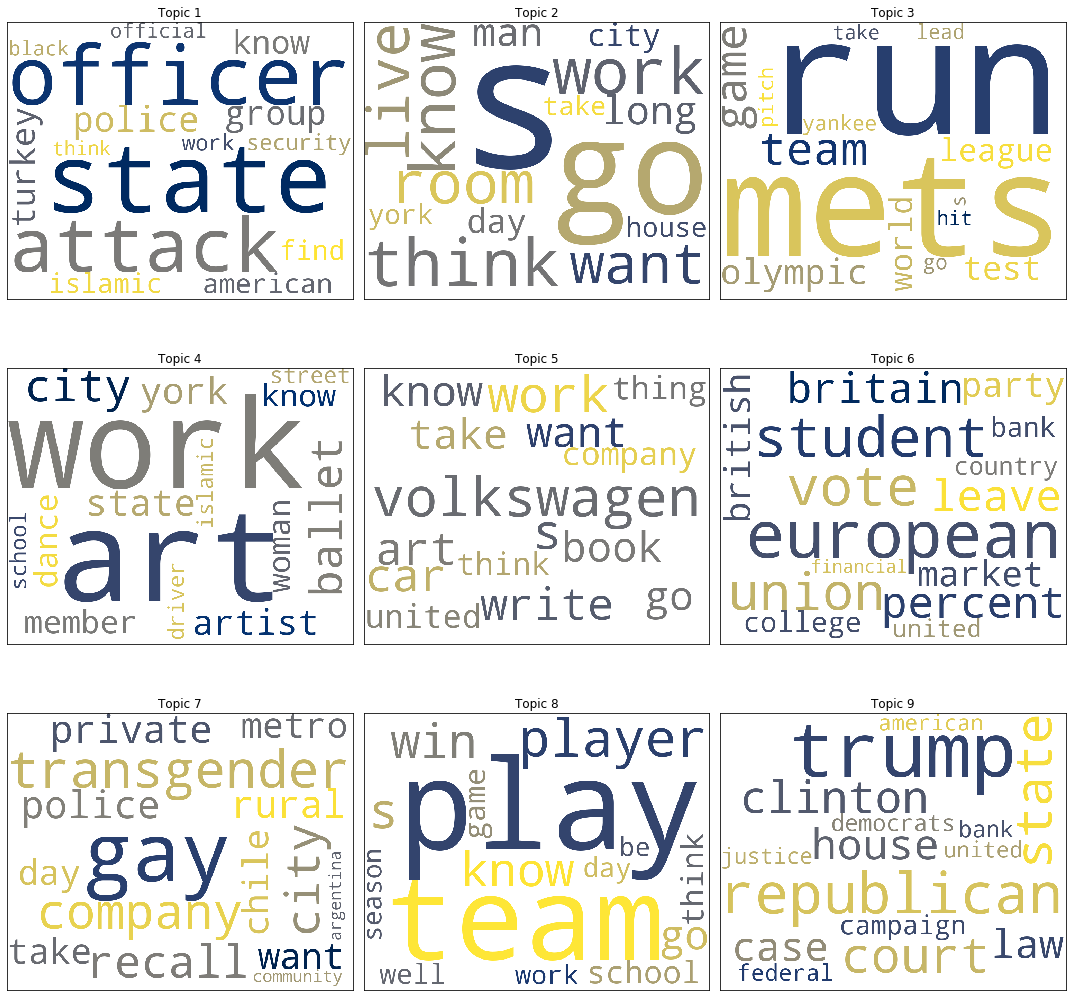

In [11]:
plot_wordclouds(model.show_topics(formatted=False, num_topics=num_topics, num_words=15))